# Parallel Computing With MPI4Py
## Overview
<p>
Parallel computing is used to increase performance and decrease the overall time to solution. When parallel computing libraries are used, they can reduce the need to write code that explicitly interacts with the hardware. 
<br><br>
In this example, we will write two simple MPI programs. The first program is a hello world program where each process will print 'hello' and print its ID number.   
    
<img src="../Resources/media_assets/HPC_Schematic.png" width=800 height=400/>
<center> A schematic of a parallel system <br><br></center>
An actual parallel computing system consists of multiple computers (nodes), with each node containing one or multiple CPUs. Modern CPUs have multiple cores. Computing in parallel can be done across multiple nodes, across multiple cores, or a combination of both.

    

There are several libraries used for parallel computing. In this module we will use mpi4py, which is an python mpi implementation built on top of MPICH. The Message Passing Interface  (MPI) is a message passing standard that allows programs to distribute instructions (messages) amongst cores or separate nodes. The goal of using parallel computing is to reduce the computation time sot that a user arrives at a solution as fast as possible. Parallel computing isn't used for most daily and routine tasks. Instead, parallel computing is often reserved for computations that can require days, weeks, and even months to complete. Additionally, some problems are too large for standard problems and they are bounded by the memory available. In this case, a form of parallel computing, called distributed computing, is needed to alleviate the requirements of a single machine. </p> 

## Agenda
- Import Parallel Libraries
- Write a Hello World Script
- Initialize communication
- Write a program that performs and operation in parallel

## Libraries Used
- **Numpy** - A package for scientific computing with Python
- **MPI4Py** - A python implementation of the MPI standard
- **Matplotlib** - A Python library for creating visualizations


## Instructions for Running Code
Due to system configuration of Stampede2, we will write the code in this Jupyter Notebook. When we run the code, we will export the code to a Python file, and run the code in parallel via an interactive session with more cores or nodes. 
<br>
The following lines need to be executed in the terminal to write the code. 
-  idev -p normal -N 1 -n 32 -m 60
-  mpirun -n #nuber_of_processes python3 filename.py

In [3]:
"""Section 1 - Hello World 
In this example, we will write a parallel script that prints to the terminal.
What separates this from other Python files is that when the code is executed, 
the code is copied to other nodes and run. When completed it then communicates 
with the 'head node' and displays the result of each node if inclined. """ 

#Import modules 
from mpi4py import MPI
import numpy as np
import time

#Creating communication, size, and rank object
comm = MPI.COMM_WORLD
size = comm.Get_size()
rank = comm.Get_rank()

print('Hello')
#print('Hello, I am process', rank+1, 'of', size)

## Questions
What does the output look like in the terminal?<br>
Can you explain why the output takes this form?<br>
Run the program a few more times. Does the output change? If so, why?

In [2]:
"""Section 2 - Dividing an array 
In this section we will create an array divide it evenly amongst the 
number of processes and then sum the array""" 
from mpi4py import MPI
import numpy as np

#Creating communication, size, and rank object
comm = MPI.COMM_WORLD
size = comm.Get_size()
rank = comm.Get_rank()

#Create an N-dimensional list
N = 50000000 #50-million entries
array = np.ndarray.tolist(np.arange(N+1))

# Write code to accomplish the task



In [3]:
#Solution
start_index = int(N * rank / size + 1)
end_index   = int(N * (rank +1)  / size) + 1

print('My array contains elements ', start_index, 'to ', end_index)
#partial_sum = sum(array[start_index:end_index])

My array contains elements  1 to  50000001


In [ ]:
"""Section 3 - Completing the program and timing the results 
In this section we will create an array divide it evenly amongst the 
number of processes and then sum the array""" 
from mpi4py import MPI
import numpy as np
import time

#Creating communication, size, and rank object
comm = MPI.COMM_WORLD
size = comm.Get_size()
rank = comm.Get_rank()

#Create an N-dimensional list
N = 50000000
array = np.ndarray.tolist(np.arange(N+1))

#Solution
start_index = int(N * rank / size + 1)
end_index   = int(N * (rank +1)  / size) + 1
partial_sum = sum(array[start_index:end_index])

#Start timing
init_time = time.time()  

#
if rank!= 0:
        comm.send(partial_sum,dest=0,tag=rank)
        comm.send((time.time() - init_time), dest = 0, tag = size+rank)

else:
        data_received = np.ndarray.tolist(np.arange(1,size+1))
        time_received = np.ndarray.tolist(np.arange(1,size+1))

        for i in list(range(1,size)):
                data_received[i] = comm.recv(source = i, tag = i)
                time_received[i] = comm.recv(source = i, tag = size+i)
        
        data_received[0] = partial_sum
        time_received[0] = time.time()-init_time

        print('Your array is ', data_received)
        print('The sum of your array is ', sum(data_received))
        print('The total time to calculate the sum was', (time.time()-init_time))

        for i in list(range(0,size)):
                print('Node', i, 'took ', time_received[i], ' seconds')

## Question
How do you think you code will behave if it is run in shared memory vs. distributed memory?

                1        10       100      1000     10000    100000   1000000
1_core   0.000245  0.000362  0.000563  0.002045  0.020071  0.211838  2.016601
2_core   0.000690  0.000993  0.001393  0.002884  0.019828  0.188487  1.801538
4_core   0.000939  0.001328  0.001853  0.003272  0.018292  0.171079  1.648367
8_core   0.001627  0.002232  0.002885  0.004389  0.018700  0.160785  1.525424
16_core  0.020951  0.026549  0.032685  0.040526  0.060357  0.206740  1.542025
32_core  0.069558  0.071290  0.073004  0.075760  0.107051  0.260913  1.757235
48_core  0.202300  0.210956  0.215616  0.226248  0.260350  0.431819  2.049183
64_core  0.203358  0.206411  0.209723  0.213686  0.234881  0.464564  2.302283


(0, 6)

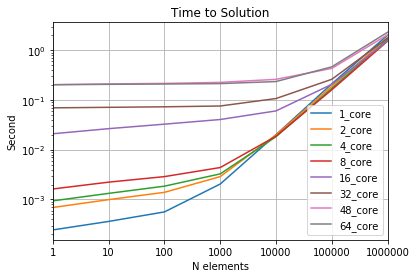

In [6]:
#Viewing benchmarking results

import pickle
import pandas as pd 
import matplotlib.pyplot as plt
path = '../Resources/datasets/vector_sum/'
process_1  = pickle.load(open(path+"1_process_results.pckl",'rb'))
process_2  = pickle.load(open(path+"2_process_results.pckl",'rb'))
process_4  = pickle.load(open(path+"4_process_results.pckl",'rb'))
process_8  = pickle.load(open(path+"8_process_results.pckl",'rb'))
process_16 = pickle.load(open(path+"16_process_results.pckl",'rb'))
process_32 = pickle.load(open(path+"32_process_results.pckl",'rb'))
process_48 = pickle.load(open(path+"48_process_results.pckl",'rb'))
process_64 = pickle.load(open(path+"64_process_results.pckl",'rb'))

data = [process_1,
        process_2,
        process_4,
        process_8,
        process_16,
        process_32,
        process_48,
        process_64]

df = pd.DataFrame(data, 
                  columns =['1', '10', '100',
                            '1000','10000','100000',
                            '1000000'], 
                  dtype = float)
df.index = ['1_core','2_core','4_core','8_core','16_core',
            '32_core','48_core','64_core']
print(df)
df=df.transpose()

#Plotting figure with pd.DataFrame.plot and Matplotlib.Pyplot  
df.plot()
plt.gca().set_xlabel('N elements')
plt.gca().set_ylabel('Second')
plt.gca().set_title('Time to Solution')
plt.gca().set_yscale('log')
plt.gca().grid(True)
plt.gca().set_xlim(0, 6)

# Challenge Questions 
-  Write code that takes the average of the array of numbers in parallel. 
-  Does it make sense to add additional parallelism?
-  How can the above code be optimized?

# Estimate the speedup
By Amdahl's Law, speedup  is the theoretical execuation of the whole program. Speedup can be calculated by this equation:
    
\begin{align*}
speedup = \frac{1}{(1-P) + \frac{P}{n}}
\end{align*}

-  where n is the number of parallel processes or threads
-  where P is the fraction of the algorithm that can be made parallel